<a href="https://colab.research.google.com/github/StefanGarcziu/DeepLearning_5semester/blob/main/DL_Zad3_StepanGarciu_135843.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A regression example**

Common type of machine learning problem is "regression", which consists of predicting a continuous value instead of a discrete label. For instance, predicting the temperature tomorrow, given meteorological data, or predicting the time that a software project will take to complete, given its specifications.

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers, regularizers, models, layers
from keras.datasets import boston_housing

import numpy as np
import matplotlib.pyplot as plt

**1-dimensional data**

In [ ]:
def funct(x):
  return x*x*np.sin(x)+np.log(2*x)

size = 100
low=0
high=12
error=10

XX_train1 = np.random.uniform(low=low, high=high, size=size)
XX_test1 = np.random.uniform(low=low, high=high, size=size)
yy_train1 = funct(XX_train1) + np.random.normal(0., error, size)
yy_test1 = funct(XX_test1) + np.random.normal(0., error, size)

print(XX_train1.shape, yy_train1.shape)

(100,) (100,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<function matplotlib.pyplot.show>

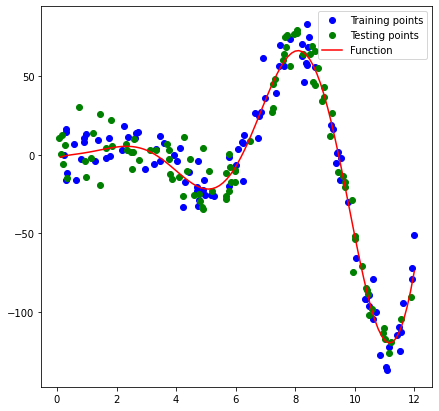

In [ ]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train1,yy_train1, 'o', color='blue', label='Training points')
plt.plot(XX_test1,yy_test1, 'o', color='green', label='Testing points')

points1 = np.linspace(low, high,num=100)
plt.plot(points1, funct(points1),  color='red', label='Function')
plt.legend()


plt.show

Preparing the data

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation. This is easily done in Numpy:

In [ ]:
# Tutaj należy znormalizować dane, i.e. 
# - odjąć średnią
# - podzielić przez odchylenie standardowe

# 
meanX1 = XX_train1.mean(axis=0)
XX_train_n1 = XX_train1-meanX1
stdX1 = XX_train_n1.std(axis=0)
XX_train_n1 /= stdX1

# to samo dla X_test
XX_test_n1 = XX_test1 - meanX1
XX_test_n1 /= stdX1

# A teraz to samo dla yy_train i yy_test
meanY1 = yy_train1.mean(axis=0)
yy_train_n1 = yy_train1-meanY1
stdY1 = yy_train_n1.std(axis=0)
yy_train_n1 /= stdY1

yy_test_n1 = yy_test1 - meanY1
yy_test_n1 /= stdY1

Define neural network

In [ ]:
# Zbudować sieć neuronową, działa: dwie warstwy ukryte, aktywacja relu
model0 = Sequential(name='network')
model0.add(layers.Dense(1024, kernel_regularizer=regularizers.l2(0.0001), activation='relu', input_shape=(1,)))
model0.add(layers.Dropout(0.2))
model0.add(layers.Dense(1024,kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model0.add(layers.Dropout(0.2))
model0.add(layers.Dense(1, activation='linear'))

model0.summary()

Model: "network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              2048      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
Total params: 1,052,673
Trainable params: 1,052,673
Non-trainable params: 0
_________________________________________________________________


Train neural network

For regression problems, mean squared error (MSE) is often employed

In [ ]:
# compile and train NN
# Uwaga: dla regresji używamy: loss = 'mean_squared_error'   oraz metrics = ['mse']

model0.compile(optimizer='adam',
                       loss='mean_squared_error',
                       metrics = ['mse'])

Plot loss

In [ ]:
history1 = model0.fit(XX_train_n1, yy_train_n1,
                                   epochs=500,
                                   batch_size=512,
                                   validation_data=(XX_test_n1, yy_test_n1))

Epoch 1/500
1/1 [==============================] - 0s 184ms/step - loss: 1.0985 - mse: 0.9958 - val_loss: 0.9370 - val_mse: 0.8352
Epoch 2/500
1/1 [==============================] - 0s 28ms/step - loss: 0.9143 - mse: 0.8125 - val_loss: 0.9631 - val_mse: 0.8623
Epoch 3/500
1/1 [==============================] - 0s 27ms/step - loss: 0.8622 - mse: 0.7614 - val_loss: 0.9991 - val_mse: 0.8993
Epoch 4/500
1/1 [==============================] - 0s 29ms/step - loss: 0.8498 - mse: 0.7500 - val_loss: 0.9890 - val_mse: 0.8903
Epoch 5/500
1/1 [==============================] - 0s 30ms/step - loss: 0.8605 - mse: 0.7618 - val_loss: 0.9434 - val_mse: 0.8459
Epoch 6/500
1/1 [==============================] - 0s 28ms/step - loss: 0.8343 - mse: 0.7368 - val_loss: 0.8911 - val_mse: 0.7947
Epoch 7/500
1/1 [==============================] - 0s 29ms/step - loss: 0.7970 - mse: 0.7007 - val_loss: 0.8522 - val_mse: 0.7570
Epoch 8/500
1/1 [==============================] - 0s 31ms/step - loss: 0.7834 - mse: 0.6

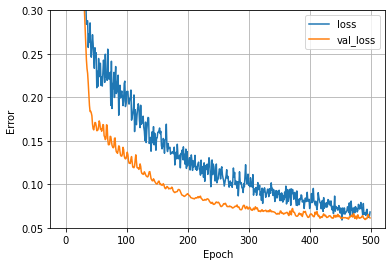

In [ ]:
def plot_loss1(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0.05, 0.3])
  plt.xlabel('Epoch')
  plt.ylabel('Error ')
  plt.legend()
  plt.grid(True)

plot_loss1(history1)

Evaluate neural network

In [ ]:
results1 = model0.evaluate(XX_test_n1, yy_test_n1)

print('loss test data: ', results1[0])
print('mse test data: ', results1[1])

results1 = model0.evaluate(XX_train_n1, yy_train_n1)

print('loss train data: ', results1[0])
print('mse train data: ', results1[1])

4/4 [==============================] - 0s 5ms/step - loss: 0.0613 - mse: 0.0416
loss test data:  0.06132246181368828
mse test data:  0.04155266657471657
4/4 [==============================] - 0s 5ms/step - loss: 0.0590 - mse: 0.0392
loss train data:  0.058997511863708496
mse train data:  0.03922771289944649


Plot results

<function matplotlib.pyplot.show>

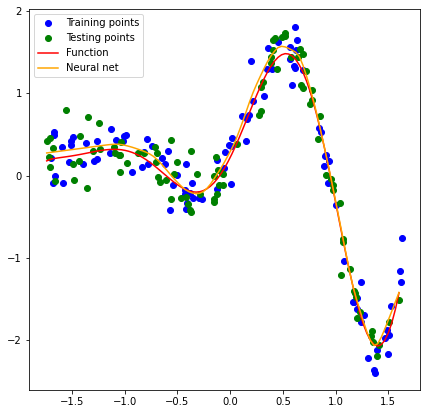

In [ ]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train_n1,yy_train_n1, 'o', color='blue', label='Training points')
plt.plot(XX_test_n1,yy_test_n1, 'o', color='green', label='Testing points')

points1 = np.linspace(min(XX_test_n1), max(XX_test_n1),num=100)
plt.plot(points1, (funct(points1*stdX1+meanX1)-meanY1)/stdY1,  color='red', label='Function')

plt.plot(points1, model0.predict(points1),  color='orange', label='Neural net')


plt.legend()


plt.show

# **Tak samo jak powyżej, ale z innymi parametrami !**

Spróbujmy zwiększyć parametr size o 400 (size = 500)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<function matplotlib.pyplot.show>

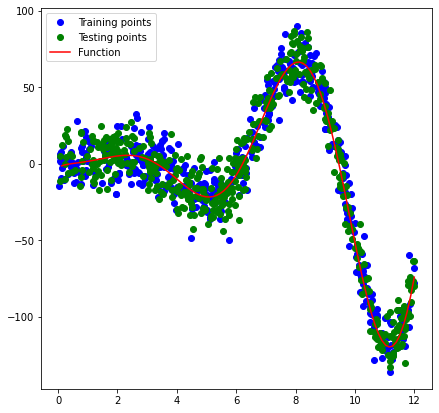

In [ ]:
size = 500

XX_train2 = np.random.uniform(low=low, high=high, size=size)
XX_test2 = np.random.uniform(low=low, high=high, size=size)
yy_train2 = funct(XX_train2) + np.random.normal(0., error, size)
yy_test2 = funct(XX_test2) + np.random.normal(0., error, size)

fig = plt.figure(figsize=(7,7))

plt.plot(XX_train2,yy_train2, 'o', color='blue', label='Training points')
plt.plot(XX_test2,yy_test2, 'o', color='green', label='Testing points')

points2 = np.linspace(low, high,num=100)
plt.plot(points2, funct(points2),  color='red', label='Function')
plt.legend()

plt.show

In [ ]:
meanX2 = XX_train2.mean(axis=0)
XX_train_n2 = XX_train2-meanX2
stdX2 = XX_train_n2.std(axis=0)
XX_train_n2 /= stdX2

# to samo dla X_test
XX_test_n2 = XX_test2 - meanX2
XX_test_n2 /= stdX2

# A teraz to samo dla yy_train i yy_test
meanY2 = yy_train2.mean(axis=0)
yy_train_n2 = yy_train2-meanY2
stdY2 = yy_train_n2.std(axis=0)
yy_train_n2 /= stdY2

yy_test_n2 = yy_test2 - meanY2
yy_test_n2 /= stdY2

model0.summary()

Model: "network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              2048      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
Total params: 1,052,673
Trainable params: 1,052,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model0.fit(XX_train_n2, yy_train_n2,
                                   epochs=500,
                                   batch_size=512,
                                   validation_data=(XX_test_n2, yy_test_n2))

Epoch 1/500
1/1 [==============================] - 0s 80ms/step - loss: 0.1151 - mse: 0.0953 - val_loss: 0.0785 - val_mse: 0.0589
Epoch 2/500
1/1 [==============================] - 0s 42ms/step - loss: 0.0851 - mse: 0.0655 - val_loss: 0.0736 - val_mse: 0.0540
Epoch 3/500
1/1 [==============================] - 0s 47ms/step - loss: 0.0797 - mse: 0.0601 - val_loss: 0.0846 - val_mse: 0.0651
Epoch 4/500
1/1 [==============================] - 0s 43ms/step - loss: 0.0825 - mse: 0.0630 - val_loss: 0.0906 - val_mse: 0.0712
Epoch 5/500
1/1 [==============================] - 0s 41ms/step - loss: 0.0863 - mse: 0.0669 - val_loss: 0.0948 - val_mse: 0.0755
Epoch 6/500
1/1 [==============================] - 0s 44ms/step - loss: 0.0875 - mse: 0.0682 - val_loss: 0.0955 - val_mse: 0.0761
Epoch 7/500
1/1 [==============================] - 0s 55ms/step - loss: 0.0931 - mse: 0.0738 - val_loss: 0.0854 - val_mse: 0.0661
Epoch 8/500
1/1 [==============================] - 0s 47ms/step - loss: 0.0829 - mse: 0.06

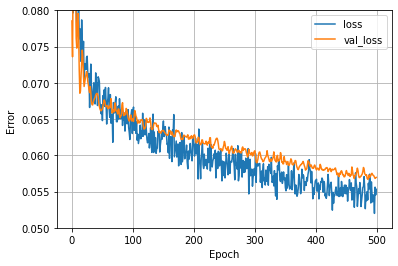

In [ ]:
def plot_loss2(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0.05, 0.08])
  plt.xlabel('Epoch')
  plt.ylabel('Error ')
  plt.legend()
  plt.grid(True)

plot_loss2(history2)

In [ ]:
results2 = model0.evaluate(XX_test_n2, yy_test_n2)

print('loss test data: ', results2[0])
print('mse test data: ', results2[1])

results2 = model0.evaluate(XX_train_n2, yy_train_n2)

print('loss train data: ', results2[0])
print('mse train data: ', results2[1])

16/16 [==============================] - 0s 6ms/step - loss: 0.0570 - mse: 0.0505
loss test data:  0.05695342645049095
mse test data:  0.05051138252019882
16/16 [==============================] - 0s 6ms/step - loss: 0.0507 - mse: 0.0443
loss train data:  0.050713859498500824
mse train data:  0.04427181929349899


<function matplotlib.pyplot.show>

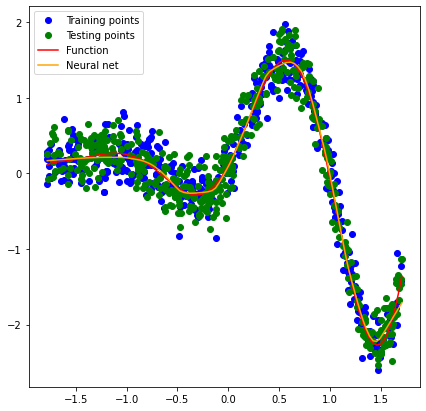

In [ ]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train_n2,yy_train_n2, 'o', color='blue', label='Training points')
plt.plot(XX_test_n2,yy_test_n2, 'o', color='green', label='Testing points')

points2 = np.linspace(min(XX_test_n2), max(XX_test_n2),num=100)
plt.plot(points2, (funct(points2*stdX2+meanX2)-meanY2)/stdY2,  color='red', label='Function')

plt.plot(points2, model0.predict(points2),  color='orange', label='Neural net')


plt.legend()


plt.show

**Spróbujmy zmniejszyć parametr error o 5 (error = 5)**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<function matplotlib.pyplot.show>

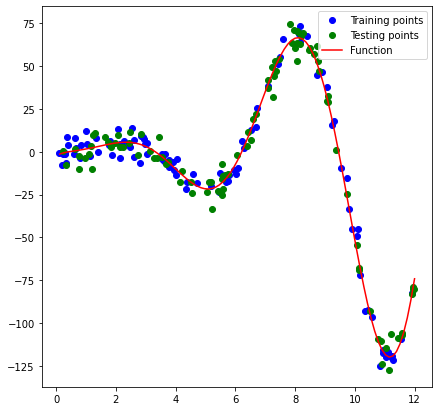

In [ ]:
error = 5
size = 100

XX_train3 = np.random.uniform(low=low, high=high, size=size)
XX_test3 = np.random.uniform(low=low, high=high, size=size)
yy_train3 = funct(XX_train3) + np.random.normal(0., error, size)
yy_test3 = funct(XX_test3) + np.random.normal(0., error, size)

fig = plt.figure(figsize=(7,7))

plt.plot(XX_train3,yy_train3, 'o', color='blue', label='Training points')
plt.plot(XX_test3,yy_test3, 'o', color='green', label='Testing points')

points3 = np.linspace(low, high,num=100)
plt.plot(points3, funct(points3),  color='red', label='Function')
plt.legend()

plt.show

In [ ]:
meanX3 = XX_train3.mean(axis=0)
XX_train_n3 = XX_train3-meanX3
stdX3 = XX_train_n3.std(axis=0)
XX_train_n3 /= stdX3

# to samo dla X_test
XX_test_n3 = XX_test3 - meanX3
XX_test_n3 /= stdX3

# A teraz to samo dla yy_train i yy_test
meanY3 = yy_train3.mean(axis=0)
yy_train_n3 = yy_train3-meanY3
stdY3 = yy_train_n3.std(axis=0)
yy_train_n3 /= stdY3

yy_test_n3 = yy_test3 - meanY3
yy_test_n3 /= stdY3

In [ ]:
history3 = model0.fit(XX_train_n3, yy_train_n3,
                                   epochs=500,
                                   batch_size=512,
                                   validation_data=(XX_test_n3, yy_test_n3))

Epoch 1/500
1/1 [==============================] - 0s 66ms/step - loss: 0.3183 - mse: 0.3118 - val_loss: 0.1564 - val_mse: 0.1500
Epoch 2/500
1/1 [==============================] - 0s 27ms/step - loss: 0.1669 - mse: 0.1606 - val_loss: 0.0899 - val_mse: 0.0836
Epoch 3/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0970 - mse: 0.0907 - val_loss: 0.0700 - val_mse: 0.0636
Epoch 4/500
1/1 [==============================] - 0s 27ms/step - loss: 0.0729 - mse: 0.0665 - val_loss: 0.1373 - val_mse: 0.1306
Epoch 5/500
1/1 [==============================] - 0s 26ms/step - loss: 0.0553 - mse: 0.0486 - val_loss: 0.2490 - val_mse: 0.2420
Epoch 6/500
1/1 [==============================] - 0s 37ms/step - loss: 0.1068 - mse: 0.0997 - val_loss: 0.2407 - val_mse: 0.2335
Epoch 7/500
1/1 [==============================] - 0s 31ms/step - loss: 0.0918 - mse: 0.0845 - val_loss: 0.1966 - val_mse: 0.1892
Epoch 8/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0872 - mse: 0.07

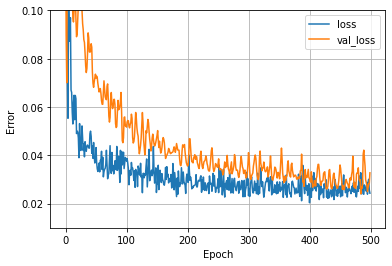

In [ ]:
def plot_loss3(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0.01, 0.1])
  plt.xlabel('Epoch')
  plt.ylabel('Error ')
  plt.legend()
  plt.grid(True)

plot_loss3(history3)

In [ ]:
results3 = model0.evaluate(XX_test_n3, yy_test_n3)

print('loss test data: ', results3[0])
print('mse test data: ', results3[1])

results3 = model0.evaluate(XX_train_n3, yy_train_n3)

print('loss train data: ', results3[0])
print('mse train data: ', results3[1])

4/4 [==============================] - 0s 5ms/step - loss: 0.0328 - mse: 0.0261
loss test data:  0.0327545590698719
mse test data:  0.026052994653582573
4/4 [==============================] - 0s 5ms/step - loss: 0.0206 - mse: 0.0139
loss train data:  0.020613977685570717
mse train data:  0.013912413269281387


<function matplotlib.pyplot.show>

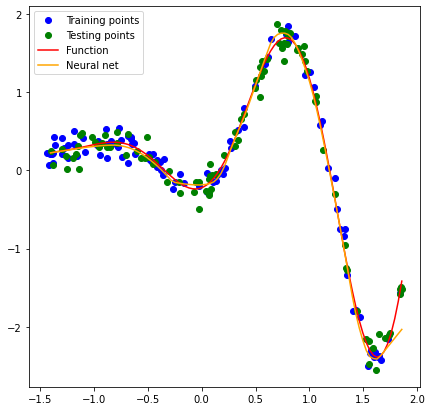

In [ ]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train_n3,yy_train_n3, 'o', color='blue', label='Training points')
plt.plot(XX_test_n3,yy_test_n3, 'o', color='green', label='Testing points')

points3 = np.linspace(min(XX_test_n3), max(XX_test_n3),num=100)
plt.plot(points3, (funct(points3*stdX3+meanX3)-meanY3)/stdY3,  color='red', label='Function')

plt.plot(points3, model0.predict(points3),  color='orange', label='Neural net')

plt.legend()

plt.show

# Spróbujmy pozostawić parametr ***error*** równy 5 (error = 5) i zwiększyć parametr ***size*** o 400 (size = 500) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<function matplotlib.pyplot.show>

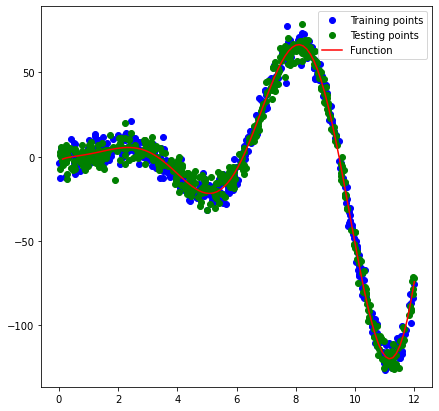

In [ ]:
error = 5
size = 500

XX_train4 = np.random.uniform(low=low, high=high, size=size)
XX_test4 = np.random.uniform(low=low, high=high, size=size)
yy_train4 = funct(XX_train4) + np.random.normal(0., error, size)
yy_test4 = funct(XX_test4) + np.random.normal(0., error, size)

fig = plt.figure(figsize=(7,7))

plt.plot(XX_train4,yy_train4, 'o', color='blue', label='Training points')
plt.plot(XX_test4,yy_test4, 'o', color='green', label='Testing points')

points4 = np.linspace(low, high,num=100)
plt.plot(points4, funct(points4),  color='red', label='Function')
plt.legend()

plt.show

In [ ]:
meanX4 = XX_train4.mean(axis=0)
XX_train_n4 = XX_train4-meanX4
stdX4 = XX_train_n4.std(axis=0)
XX_train_n4 /= stdX4

# to samo dla X_test
XX_test_n4 = XX_test4 - meanX4
XX_test_n4 /= stdX4

# A teraz to samo dla yy_train i yy_test
meanY4 = yy_train4.mean(axis=0)
yy_train_n4 = yy_train4-meanY4
stdY4 = yy_train_n4.std(axis=0)
yy_train_n4 /= stdY4

yy_test_n4 = yy_test4 - meanY4
yy_test_n4 /= stdY4

In [ ]:
model0.compile(optimizer='adam',
                       loss='mean_squared_error',
                       metrics = ['mse'])

history4 = model0.fit(XX_train_n4, yy_train_n4,
                                   epochs=500,
                                   batch_size=512,
                                   validation_data=(XX_test_n4, yy_test_n4))

Epoch 1/500
1/1 [==============================] - 0s 174ms/step - loss: 0.2818 - mse: 0.2751 - val_loss: 0.1391 - val_mse: 0.1323
Epoch 2/500
1/1 [==============================] - 0s 43ms/step - loss: 0.1424 - mse: 0.1356 - val_loss: 0.1029 - val_mse: 0.0960
Epoch 3/500
1/1 [==============================] - 0s 45ms/step - loss: 0.1023 - mse: 0.0954 - val_loss: 0.0596 - val_mse: 0.0527
Epoch 4/500
1/1 [==============================] - 0s 47ms/step - loss: 0.0653 - mse: 0.0584 - val_loss: 0.0326 - val_mse: 0.0256
Epoch 5/500
1/1 [==============================] - 0s 42ms/step - loss: 0.0381 - mse: 0.0312 - val_loss: 0.0438 - val_mse: 0.0369
Epoch 6/500
1/1 [==============================] - 0s 44ms/step - loss: 0.0562 - mse: 0.0493 - val_loss: 0.0597 - val_mse: 0.0528
Epoch 7/500
1/1 [==============================] - 0s 45ms/step - loss: 0.0723 - mse: 0.0654 - val_loss: 0.0589 - val_mse: 0.0520
Epoch 8/500
1/1 [==============================] - 0s 44ms/step - loss: 0.0673 - mse: 0.0

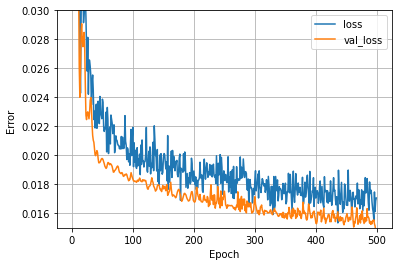

In [ ]:
def plot_loss4(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0.015, 0.03])
  plt.xlabel('Epoch')
  plt.ylabel('Error ')
  plt.legend()
  plt.grid(True)

plot_loss4(history4)

In [ ]:
results4 = model0.evaluate(XX_test_n4, yy_test_n4)

print('loss test data: ', results4[0])
print('mse test data: ', results4[1])

results4 = model0.evaluate(XX_train_n4, yy_train_n4)

print('loss train data: ', results4[0])
print('mse train data: ', results4[1])

16/16 [==============================] - 0s 5ms/step - loss: 0.0149 - mse: 0.0116
loss test data:  0.014893820509314537
mse test data:  0.011627853848040104
16/16 [==============================] - 0s 6ms/step - loss: 0.0137 - mse: 0.0104
loss train data:  0.013681475073099136
mse train data:  0.010415506549179554


<function matplotlib.pyplot.show>

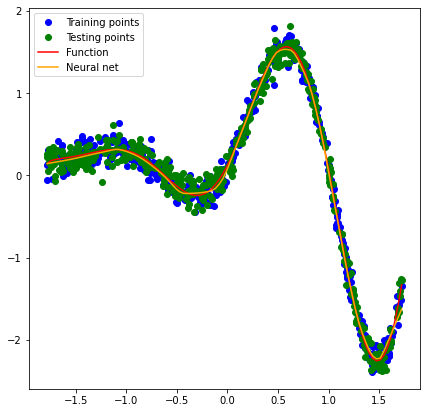

In [ ]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train_n4,yy_train_n4, 'o', color='blue', label='Training points')
plt.plot(XX_test_n4,yy_test_n4, 'o', color='green', label='Testing points')

points4 = np.linspace(min(XX_test_n4), max(XX_test_n4),num=100)
plt.plot(points4, (funct(points4*stdX4+meanX4)-meanY4)/stdY4,  color='red', label='Function')

plt.plot(points4, model0.predict(points4),  color='orange', label='Neural net')

plt.legend()


plt.show

# **Wniosek**

Po tym, jak zwiększyliśmy ***size=500*** i zmniejszyliśmy ***error=5***,udało nam się uzyskać najbardziej optymalne rozwiązanie dopasowania linii do wykresu.
(val_loss: **0.0149** - val_mse: **0.0116**)